# Week 7 assignments: Gene expression
#### Zelin Wei
5 Nov. 2020

## Clustering

In [243]:
import pandas as pd
from scipy.cluster.hierarchy import linkage, leaves_list, dendrogram
import numpy as np
import matplotlib.pyplot as plt

### Load data, filter genes with low expression level, and log2-transform the data

In [244]:
allAnno = pd.read_csv('all_annotated.csv', sep = ',')
allAnno

,t_name,gene_name,male_10,male_11,male_12,male_13,male_14A,male_14B,male_14C,male_14D,female_10,female_11,female_12,female_13,female_14A,female_14B,female_14C,female_14D
0,FBtr0114258,CR41571,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
1,FBtr0346770,CG45784,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
2,FBtr0302440,CR12798,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
3,FBtr0302347,CR40182,23.712564,11.967821,20.767498,13.566818,18.802116,26.802691,22.819895,11.682728,21.894249,13.922059,16.482141,12.622680,31.800016,22.883186,14.330216,17.20257
4,FBtr0346769,CG45783,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34713,FBtr0114187,CR40502,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
34714,FBtr0304147,CR40719,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
34715,FBtr0114216,CR40679,2.011199,0.000000,7.994137,2.064200,3.141665,0.000000,1.519102,9.190801,13.475658,1.771435,4.649351,7.004174,6.904506,0.835856,1.151747,1.98591
34716,FBtr0114222,CR40743,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000


In [245]:
adjdf = allAnno[allAnno.iloc[:, 2:].median(axis = 1) > 0]
adjdf.iloc[:, 2:] = np.log2(adjdf.iloc[:, 2:] + 0.1)
adjdf

/Users/zelinwei/miniconda3/lib/python3.6/site-packages/pandas/core/indexing.py:1717: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, v)


,t_name,gene_name,male_10,male_11,male_12,male_13,male_14A,male_14B,male_14C,male_14D,female_10,female_11,female_12,female_13,female_14A,female_14B,female_14C,female_14D
3,FBtr0302347,CR40182,4.573651,3.593093,4.383186,3.772605,4.240476,4.749679,4.518529,3.558602,4.459054,3.809626,4.051558,3.669331,4.995485,4.522507,3.851021,4.112914
8,FBtr0113885,Parp,3.472120,-3.321928,-3.321928,-3.321928,3.897757,-3.321928,4.145813,3.436875,-3.321928,-3.321928,3.905799,3.869772,4.353582,2.066050,-3.321928,4.665883
9,FBtr0301810,Alg-2,4.260622,-3.321928,3.900371,4.801878,4.484797,2.990301,3.801070,3.701063,4.222705,1.594158,4.209672,4.729653,4.784754,2.913181,2.897078,4.516802
10,FBtr0113895,Tim17b,2.681610,2.012708,2.665469,6.130167,6.072718,2.945977,6.230339,5.750615,5.486961,4.081859,5.728691,6.286330,6.338167,4.998373,5.621212,6.280001
11,FBtr0345179,Tim17b,6.899972,3.552258,6.909741,6.245611,6.188155,6.953605,6.345793,5.901059,5.602316,4.196805,5.844084,6.439396,6.453632,5.113628,5.736589,6.410012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34663,FBtr0100884,mt:Cyt-b,5.063561,0.209330,3.312209,8.696872,6.681296,4.675181,6.166922,6.945737,6.905339,-0.371506,5.597221,6.170259,7.891809,5.452891,6.239269,7.386673
34665,FBtr0100886,mt:ND1,4.661599,-0.437467,4.418274,9.014515,8.350559,5.778312,8.493319,7.797501,8.259794,1.172241,7.649749,8.615611,8.760742,4.441070,6.523595,9.412730
34667,FBtr0100888,mt:lrRNA,11.191931,5.095088,9.857502,12.271701,11.136488,9.213941,11.283776,10.690080,11.332554,6.260317,11.087133,11.867576,6.942632,8.818194,9.435277,12.153787
34684,FBtr0114261,CR41590,-2.534805,-3.321928,-2.348207,-2.301821,-3.321928,-3.321928,-3.321928,-2.143405,0.003268,-3.321928,-3.321928,-1.927886,-1.913863,-3.321928,-3.321928,-2.713053


### Normalize the data for subsequent analysis

In [246]:
for i in range(8613):
    adjdf.iloc[i, 2:] = (adjdf.iloc[i, 2:] - adjdf.iloc[i, 2:].mean()) / adjdf.iloc[i, 2:].std()

adjdf

/Users/zelinwei/miniconda3/lib/python3.6/site-packages/pandas/core/indexing.py:1760: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, v)


,t_name,gene_name,male_10,male_11,male_12,male_13,male_14A,male_14B,male_14C,male_14D,female_10,female_11,female_12,female_13,female_14A,female_14B,female_14C,female_14D
3,FBtr0302347,CR40182,0.894399,-1.326899,0.462930,-0.920243,0.139644,1.293162,0.769528,-1.405035,0.634799,-0.836378,-0.288319,-1.154196,1.849998,0.778540,-0.742605,-0.149327
8,FBtr0113885,Parp,0.766785,-1.085765,-1.085765,-1.085765,0.882845,-1.085765,0.950483,0.757175,-1.085765,-1.085765,0.885037,0.875214,1.007136,0.383388,-1.085765,1.092291
9,FBtr0301810,Alg-2,0.428503,-3.370617,0.248005,0.699691,0.540822,-0.207972,0.198251,0.148145,0.409505,-0.907488,0.402975,0.663503,0.691111,-0.246612,-0.254680,0.556858
10,FBtr0113895,Tim17b,-1.478530,-1.913186,-1.489018,0.762364,0.725033,-1.306743,0.827456,0.515728,0.344404,-0.568639,0.501482,0.863839,0.897524,0.026917,0.431642,0.859727
11,FBtr0345179,Tim17b,1.027117,-2.497985,1.037403,0.338083,0.277583,1.083592,0.443573,-0.024726,-0.339299,-1.819285,-0.084720,0.542136,0.557127,-0.853882,-0.197911,0.511195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34663,FBtr0100884,mt:Cyt-b,-0.149574,-2.083787,-0.847416,1.298152,0.495028,-0.304327,0.290070,0.600397,0.584299,-2.315226,0.063068,0.291400,0.977368,0.005558,0.318898,0.776092
34665,FBtr0100886,mt:ND1,-0.608902,-2.362639,-0.692590,0.888209,0.659853,-0.224828,0.708952,0.469638,0.628635,-1.809008,0.418821,0.751013,0.800928,-0.684750,0.031499,1.025168
34667,FBtr0100888,mt:lrRNA,0.588187,-2.219895,-0.026424,1.085507,0.562651,-0.322836,0.630489,0.357044,0.652955,-1.683215,0.539919,0.899375,-1.368954,-0.505109,-0.220892,1.031198
34684,FBtr0114261,CR41590,0.131551,-0.741197,0.338448,0.389880,-0.741197,-0.741197,-0.741197,0.565529,2.945723,-0.741197,-0.741197,0.804493,0.820041,-0.741197,-0.741197,-0.066087


### Cluster genes and samples respectively using `linkage`

Since the output of `leaves_list` is the numerical identifier of samples/genes, I store gene/sample names in `genenames` and `sampnames`.

In [247]:
genetree = linkage(adjdf.iloc[:, 2:], 'ward')
geneleaf = leaves_list(genetree)
genenames = [adjdf.iloc[i, 1] for i in geneleaf]
print(genetree)
print(geneleaf)

[[8.46900000e+03 8.47000000e+03 0.00000000e+00 2.00000000e+00]
 [4.66400000e+03 4.66500000e+03 0.00000000e+00 2.00000000e+00]
 [1.97700000e+03 1.97800000e+03 0.00000000e+00 2.00000000e+00]
 ...
 [1.72160000e+04 1.72180000e+04 9.99141358e+01 3.30600000e+03]
 [1.72170000e+04 1.72210000e+04 1.50659261e+02 5.30700000e+03]
 [1.72220000e+04 1.72230000e+04 2.31355403e+02 8.61300000e+03]]
[7026 7027 3657 ... 4209 4053 6605]


In [248]:
samptree = linkage(adjdf.T.iloc[2:, :], 'ward')
sampleaf = leaves_list(samptree)
sampnames = [adjdf.columns[i+2] for i in sampleaf]
sampnames = ['t_name', 'gene_name'] + sampnames
print(samptree)
print(sampnames)

[[  2.          10.          72.15743588   2.        ]
 [  0.           8.          78.25798123   2.        ]
 [  4.          12.          78.4565372    2.        ]
 [ 16.          17.          90.55017551   4.        ]
 [  7.          14.          90.64669606   2.        ]
 [  6.          15.          93.85021967   2.        ]
 [ 20.          21.          94.56927931   4.        ]
 [  3.          11.          99.17410393   2.        ]
 [  5.          13.          99.35942658   2.        ]
 [  1.           9.         106.25712507   2.        ]
 [ 18.          23.         112.29883989   4.        ]
 [ 19.          25.         139.64819142   6.        ]
 [ 24.          26.         156.5980199    6.        ]
 [ 27.          28.         228.46285313  12.        ]
 [ 22.          29.         258.66379222  16.        ]]
['t_name', 'gene_name', 'male_14D', 'female_14C', 'male_14C', 'female_14D', 'male_12', 'female_12', 'male_10', 'female_10', 'male_11', 'female_11', 'male_14B', 'female_14B', 

### Drawing heatmap and dendrogram.

In [249]:
heatmapdf = adjdf.iloc[geneleaf, :]
heatmapdf = heatmapdf.loc[:, sampnames]
heatmapdf

,t_name,gene_name,male_14D,female_14C,male_14C,female_14D,male_12,female_12,male_10,female_10,male_11,female_11,male_14B,female_14B,male_14A,female_14A,male_13,female_13
27591,FBtr0306536,dbr,0.601262,-0.940827,0.254592,-0.940827,-0.940827,-0.940827,1.123226,-0.940827,-0.940827,1.044027,-0.940827,-0.940827,1.228450,0.904953,1.230055,1.140054
27593,FBtr0078100,dbr,0.001713,-0.914587,0.341576,-0.914587,-0.914587,-0.914587,1.275740,-0.914587,-0.914587,0.964967,-0.914587,-0.914587,1.231206,1.040782,1.286230,1.174482
14483,FBtr0299906,Arf79F,0.322833,0.483813,-0.244993,-0.546836,-1.675414,0.838044,0.800650,-1.107431,0.040956,0.512504,-1.312114,-1.816265,0.604692,1.056285,1.211639,0.831637
33013,FBtr0343115,Faf,-0.415661,-0.062379,-0.247207,-0.367264,-1.568332,-1.146993,0.638521,0.518747,0.681339,0.884815,-1.660354,-1.373010,1.118742,1.111505,0.849393,1.038138
21714,FBtr0344737,svr,-1.395345,-0.282368,0.136458,0.010376,-1.063807,-1.609443,-0.378962,1.297334,-1.589710,0.830802,0.993451,0.432232,-0.266278,1.237793,0.658534,0.988933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23955,FBtr0071342,Zpr1,-1.512403,-0.963796,-2.058165,-0.915736,0.439218,-0.173738,0.179255,0.022852,1.334961,1.095991,0.064313,1.169879,0.490038,0.241108,-0.608884,1.195108
22761,FBtr0070702,rb,-1.321117,-0.771717,-1.534038,-0.759547,0.868776,0.809773,0.529273,0.440865,0.662289,0.277946,0.104687,0.479868,0.955127,1.237793,-2.148059,0.168081
16579,FBtr0089366,lola,-1.394535,-1.394535,-1.394535,-1.394535,0.794168,0.749689,0.107714,0.318619,0.408608,0.559922,0.889784,0.793677,1.073958,0.862131,-1.394535,0.414408
16030,FBtr0088624,alc,-1.340385,-1.055487,-1.539601,-1.467925,0.753378,0.615446,0.582639,0.452110,0.929517,0.910487,0.218859,0.690888,0.654580,0.368014,-1.609656,0.837136


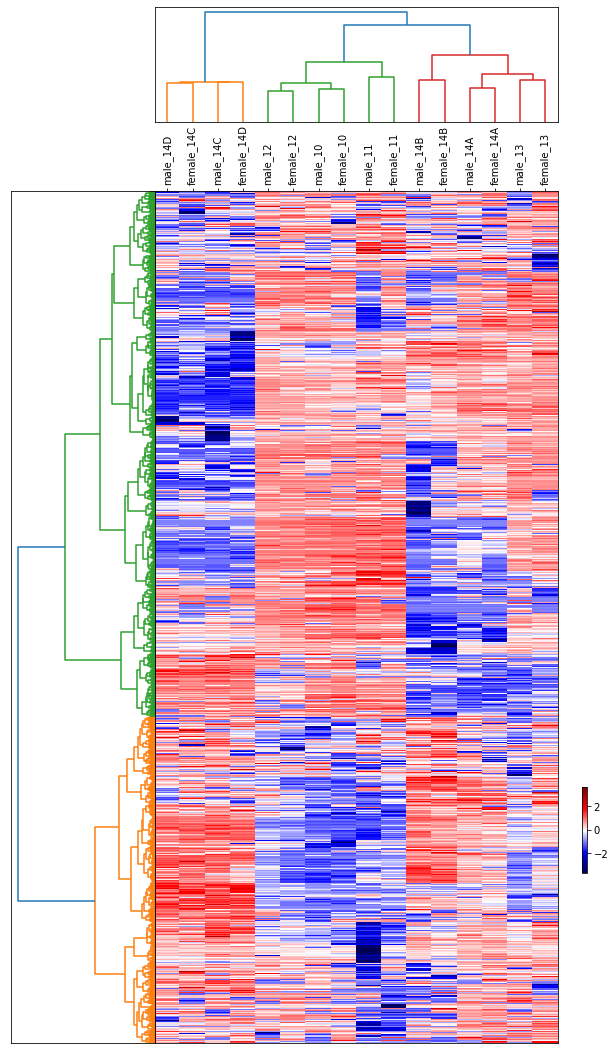

In [293]:
fig,ax = plt.subplots(figsize = (8, 16))
plt.axis('off')
ax1 = plt.axes([0.25, 0, 0.7, 0.74])
h = ax1.pcolor(heatmapdf.iloc[:, 2:], cmap = plt.cm.seismic)
ax1.set_xticks(np.arange(heatmapdf.shape[1]-2)+0.5)
ax1.set_xticklabels(sampnames[2:])
ax1.xaxis.tick_top()
ax1.set_yticks([])
plt.xticks(rotation = 90)
ax0 = plt.axes([0.95, 0, 0.05, 0.37])
ax0.set_yticks([])
ax0.set_xticks([])
ax0.spines['top'].set_visible(False)
ax0.spines['right'].set_visible(False)
ax0.spines['bottom'].set_visible(False)
fig.colorbar(h)
ax2 = plt.axes([0.25, 0.8, 0.7, 0.1])
ax2.set_xticks([])
ax2.set_yticks([])
ax2 = dendrogram(samptree, no_labels = True, orientation = 'top')
ax3 = plt.axes([0, 0, 0.25, 0.74])
ax3.set_xticks([])
ax3.set_yticks([])
ax3 = dendrogram(genetree, no_labels = True, orientation = 'left')
plt.savefig('DendroHeatmap')
plt.show()

Since there are too many genes, I hide gene names in the graph above, and print gene names below in the order from the bottom of the heatmap to the top.

In [251]:
print(genenames)

['dbr', 'dbr', 'Arf79F', 'Faf', 'svr', 'AnxB9', 'CR43334', 'CG33145', 'CG42724', 'sip2', 'CR43334', 'CR43334', 'CG11790', 'CR45620', 'CR45907', 'CR44731', 'CR43948', 'His4r', 'Pp4-19C', 'ZC3H3', 'CR44383', 'eIF-4a', 'eIF-4a', 'pgc', 'eIF-4a', 'wac', 'CR43963', 'koko', 'CG16721', 'CG2943', 'CG2943', 'CG2124', 'CG13384', 'CR45326', 'CG31674', 'CG12717', 'CG12717', 'CG1983', 'CG1983', 'CG8526', 'Not3', 'CR43837', 'pncr013:4', 'Pnn', 'pncr013:4', 'CG31739', 'Rad23', 'mt:tRNA:L:UUR', 'Crk', 'CR33221', 'CG3262', 'Slip1', 'Slip1', 'CG31674', 'Pur-alpha', 'RpS10b', 'CG12179', 'CG12179', 'alpha-Spec', 'l(1)G0222', 'CG11586', 'dlt', 'Cnot4', 'CG15784', 'CG15784', 'skap', 'CG14561', 'CG6443', 'CG5380', 'CG33096', 'CRG', 'mt:lrRNA', 'CR46081', 'CG17737', 'CR44228', 'CR44294', 'CR40354', 'Rab2', 'Tim17b', 'CR43944', 'mt:CoI', 'mt:ND4', 'mt:Cyt-b', 'mt:CoIII', 'mt:ND1', 'Act5C', 'Act5C', 'Act5C', 'pzg', 'Rbp2', 'corto', 'corto', 'corto', 'corto', 'SkpA', 'CG12006', 'mt:tRNA:K', 'cav', 'SkpA', 'SkpA'

## Differential expression

In [215]:
import statsmodels.api as sm 
import statsmodels.formula.api as smf

### Add stage and sex information to the data frame.

In [252]:
lsdf = adjdf.T
lsdf.columns = lsdf.loc['gene_name', :]
lsdf = lsdf.loc['male_10':, :]
lsdf['stage'] = [10.0, 11.0, 12.0, 13.0, 14.0, 14.0, 14.0, 14.0, 10.0, 11.0, 12.0, 13.0, 14.0, 14.0, 14.0, 14.0]
lsdf['sex'] = ['male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female']
lsdf

gene_name,CR40182,Parp,Alg-2,Tim17b,Tim17b,CG41128,CG41099,CG41099,CG12581,CG12582,...,mt:ND3,mt:ND5,mt:ND4,mt:Cyt-b,mt:ND1,mt:lrRNA,CR41590,CR40679,stage,sex
male_10,0.894399,0.766785,0.428503,-1.47853,1.02712,-0.460607,0.883615,0.696385,-0.944864,0.395624,...,-1.04019,-0.432161,-0.425905,-0.149574,-0.608902,0.588187,0.131551,-0.0231011,10.0,male
male_11,-1.3269,-1.08576,-3.37062,-1.91319,-2.49798,-3.39005,-1.08256,-1.07963,-0.944864,0.630231,...,-1.04019,-2.32119,-2.07383,-2.08379,-2.36264,-2.2199,-0.741197,-2.15067,11.0,male
male_12,0.46293,-1.08576,0.248005,-1.48902,1.0374,-0.128853,-1.08256,1.11023,-0.944864,0.760739,...,-1.04019,-0.034664,-0.92736,-0.847416,-0.69259,-0.0264243,0.338448,0.914391,12.0,male
male_13,-0.920243,-1.08576,0.699691,0.762364,0.338083,0.426272,0.907021,0.956349,-0.944864,0.583215,...,-1.04019,0.896688,0.689781,1.29815,0.888209,1.08551,0.38988,-0.00580435,13.0,male
male_14A,0.139644,0.882845,0.540822,0.725033,0.277583,0.488788,0.916719,0.52095,0.478266,0.581729,...,1.02803,0.88002,0.65295,0.495028,0.659853,0.562651,-0.741197,0.276051,14.0,male
male_14B,1.29316,-1.08576,-0.207972,-1.30674,1.08359,0.380451,-1.08256,-1.07963,0.766381,-1.65825,...,-1.04019,-0.476528,-0.0575992,-0.304327,-0.224828,-0.322836,-0.741197,-2.15067,14.0,male
male_14C,0.769528,0.950483,0.198251,0.827456,0.443573,0.708358,0.802158,-1.07963,1.18448,0.401757,...,0.997118,0.878921,0.559947,0.29007,0.708952,0.630489,-0.741197,-0.208233,14.0,male
male_14D,-1.40503,0.757175,0.148145,0.515728,-0.0247261,0.238716,0.315773,0.857681,1.26587,-1.65825,...,0.872558,0.0953254,0.424902,0.600397,0.469638,0.357044,0.565529,1.01058,14.0,male
female_10,0.634799,-1.08576,0.409505,0.344404,-0.339299,0.11313,0.737769,0.83102,-0.944864,0.719452,...,0.303835,-0.142667,0.260422,0.584299,0.628635,0.652955,2.94572,1.27515,10.0,female
female_11,-0.836378,-1.08576,-0.907488,-0.568639,-1.81929,-0.785847,-1.08256,-1.07963,-0.944864,0.28401,...,-1.04019,-1.73984,-2.20167,-2.31523,-1.80901,-1.68321,-0.741197,-0.107197,11.0,female


Since some genes appear more than once in the data frame, I replace all gene names with 'gene' and a number for subsequent linear regression.

In [253]:
lsgenes = lsdf.columns
lsdf.columns = ['gene'+str(i) for i in range(8613)] + ['stage', 'sex']
lsdf.index = [i for i in range(16)]
lsdf

,gene0,gene1,gene2,gene3,gene4,gene5,gene6,gene7,gene8,gene9,...,gene8605,gene8606,gene8607,gene8608,gene8609,gene8610,gene8611,gene8612,stage,sex
0,0.894399,0.766785,0.428503,-1.47853,1.02712,-0.460607,0.883615,0.696385,-0.944864,0.395624,...,-1.04019,-0.432161,-0.425905,-0.149574,-0.608902,0.588187,0.131551,-0.0231011,10.0,male
1,-1.3269,-1.08576,-3.37062,-1.91319,-2.49798,-3.39005,-1.08256,-1.07963,-0.944864,0.630231,...,-1.04019,-2.32119,-2.07383,-2.08379,-2.36264,-2.2199,-0.741197,-2.15067,11.0,male
2,0.46293,-1.08576,0.248005,-1.48902,1.0374,-0.128853,-1.08256,1.11023,-0.944864,0.760739,...,-1.04019,-0.034664,-0.92736,-0.847416,-0.69259,-0.0264243,0.338448,0.914391,12.0,male
3,-0.920243,-1.08576,0.699691,0.762364,0.338083,0.426272,0.907021,0.956349,-0.944864,0.583215,...,-1.04019,0.896688,0.689781,1.29815,0.888209,1.08551,0.38988,-0.00580435,13.0,male
4,0.139644,0.882845,0.540822,0.725033,0.277583,0.488788,0.916719,0.52095,0.478266,0.581729,...,1.02803,0.88002,0.65295,0.495028,0.659853,0.562651,-0.741197,0.276051,14.0,male
5,1.29316,-1.08576,-0.207972,-1.30674,1.08359,0.380451,-1.08256,-1.07963,0.766381,-1.65825,...,-1.04019,-0.476528,-0.0575992,-0.304327,-0.224828,-0.322836,-0.741197,-2.15067,14.0,male
6,0.769528,0.950483,0.198251,0.827456,0.443573,0.708358,0.802158,-1.07963,1.18448,0.401757,...,0.997118,0.878921,0.559947,0.29007,0.708952,0.630489,-0.741197,-0.208233,14.0,male
7,-1.40503,0.757175,0.148145,0.515728,-0.0247261,0.238716,0.315773,0.857681,1.26587,-1.65825,...,0.872558,0.0953254,0.424902,0.600397,0.469638,0.357044,0.565529,1.01058,14.0,male
8,0.634799,-1.08576,0.409505,0.344404,-0.339299,0.11313,0.737769,0.83102,-0.944864,0.719452,...,0.303835,-0.142667,0.260422,0.584299,0.628635,0.652955,2.94572,1.27515,10.0,female
9,-0.836378,-1.08576,-0.907488,-0.568639,-1.81929,-0.785847,-1.08256,-1.07963,-0.944864,0.28401,...,-1.04019,-1.73984,-2.20167,-2.31523,-1.80901,-1.68321,-0.741197,-0.107197,11.0,female


### Linear regression without sex

In [254]:
p = []
coef = []
for i in range(8613):
    func = 'gene'+str(i)+' ~ stage'
    lsdf['gene'+str(i)] = [lsdf['gene'+str(i)][j] for j in range(16)]
    model = smf.ols(formula = func, data = lsdf)
    results = model.fit()
    p.append(results.pvalues[1])
    coef.append(results.params[1])

In [255]:
adjdf['p_nosex'] = p
adjdf['coef_nosex'] = coef
adjdf

/Users/zelinwei/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/zelinwei/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,t_name,gene_name,male_10,male_11,male_12,male_13,male_14A,male_14B,male_14C,male_14D,female_10,female_11,female_12,female_13,female_14A,female_14B,female_14C,female_14D,p_nosex,coef_nosex
3,FBtr0302347,CR40182,0.894399,-1.326899,0.462930,-0.920243,0.139644,1.293162,0.769528,-1.405035,0.634799,-0.836378,-0.288319,-1.154196,1.849998,0.778540,-0.742605,-0.149327,0.735893,0.059950
8,FBtr0113885,Parp,0.766785,-1.085765,-1.085765,-1.085765,0.882845,-1.085765,0.950483,0.757175,-1.085765,-1.085765,0.885037,0.875214,1.007136,0.383388,-1.085765,1.092291,0.162378,0.240072
9,FBtr0301810,Alg-2,0.428503,-3.370617,0.248005,0.699691,0.540822,-0.207972,0.198251,0.148145,0.409505,-0.907488,0.402975,0.663503,0.691111,-0.246612,-0.254680,0.556858,0.263080,0.194775
10,FBtr0113895,Tim17b,-1.478530,-1.913186,-1.489018,0.762364,0.725033,-1.306743,0.827456,0.515728,0.344404,-0.568639,0.501482,0.863839,0.897524,0.026917,0.431642,0.859727,0.031521,0.352310
11,FBtr0345179,Tim17b,1.027117,-2.497985,1.037403,0.338083,0.277583,1.083592,0.443573,-0.024726,-0.339299,-1.819285,-0.084720,0.542136,0.557127,-0.853882,-0.197911,0.511195,0.221445,0.211856
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34663,FBtr0100884,mt:Cyt-b,-0.149574,-2.083787,-0.847416,1.298152,0.495028,-0.304327,0.290070,0.600397,0.584299,-2.315226,0.063068,0.291400,0.977368,0.005558,0.318898,0.776092,0.049018,0.326779
34665,FBtr0100886,mt:ND1,-0.608902,-2.362639,-0.692590,0.888209,0.659853,-0.224828,0.708952,0.469638,0.628635,-1.809008,0.418821,0.751013,0.800928,-0.684750,0.031499,1.025168,0.051185,0.324124
34667,FBtr0100888,mt:lrRNA,0.588187,-2.219895,-0.026424,1.085507,0.562651,-0.322836,0.630489,0.357044,0.652955,-1.683215,0.539919,0.899375,-1.368954,-0.505109,-0.220892,1.031198,0.546605,0.106654
34684,FBtr0114261,CR41590,0.131551,-0.741197,0.338448,0.389880,-0.741197,-0.741197,-0.741197,0.565529,2.945723,-0.741197,-0.741197,0.804493,0.820041,-0.741197,-0.741197,-0.066087,0.170680,-0.235737


### QQ plot without controlling sex

In [256]:
nosexdf = adjdf.sort_values(by = 'p_nosex')
nosexdf['p_expected'] = (np.arange(8613)+1)/8613
nosexdf['-logp_nosex'] = -np.log10(nosexdf['p_nosex'])
nosexdf['-logp_expected'] = -np.log10(nosexdf['p_expected'])
nosexdf

,t_name,gene_name,male_10,male_11,male_12,male_13,male_14A,male_14B,male_14C,male_14D,...,female_13,female_14A,female_14B,female_14C,female_14D,p_nosex,coef_nosex,p_expected,-logp_nosex,-logp_expected
20646,FBtr0071924,Ppa,-1.619458,-1.067838,-0.469793,0.058516,0.744762,0.953572,0.740274,0.802315,...,0.086747,0.803712,0.893702,0.889975,0.905391,8.260525e-15,0.650662,0.000116,14.082992,3.935154
20647,FBtr0330249,Ppa,-1.619458,-1.067838,-0.469793,0.058516,0.744762,0.953572,0.740274,0.802315,...,0.086747,0.803712,0.893702,0.889975,0.905391,8.260525e-15,0.650662,0.000232,14.082992,3.634124
20645,FBtr0343014,Ppa,-1.608726,-1.080248,-0.482852,0.050976,0.746560,0.958364,0.742007,0.804934,...,0.079562,0.806351,0.897632,0.893852,0.909489,1.454301e-14,0.650326,0.000348,13.837346,3.458033
31213,FBtr0080193,CG14915,-1.610521,-0.912963,-0.291593,0.024372,0.611349,0.934829,0.947850,0.760982,...,0.227211,0.543862,0.804264,0.914268,0.781926,1.047712e-11,0.643531,0.000464,10.979758,3.333094
8734,FBtr0072872,CG8960,-1.735691,-0.959507,-0.276937,0.119640,0.482266,0.833156,0.819946,0.793056,...,0.323830,0.558783,0.943115,0.960569,0.719588,2.536184e-11,0.642023,0.000581,10.595819,3.236184
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23593,FBtr0071095,RpS14a,0.198663,-0.649073,0.328632,-0.322096,0.764758,0.511103,0.840189,1.062026,...,-0.530177,0.649286,1.102237,-2.009865,-2.368579,9.985308e-01,0.000328,0.999536,0.000639,0.000202
22297,FBtr0345315,CG2924,0.812154,-0.078765,0.545372,0.959713,0.845331,-0.661262,-0.653000,-0.495311,...,-0.712855,0.716311,0.530679,0.696319,-0.082080,9.987745e-01,-0.000274,0.999652,0.000533,0.000151
4086,FBtr0300247,CG7215,1.662084,-0.568209,1.772774,-0.831349,-0.641496,-0.620478,0.523850,0.575282,...,-0.686318,-0.642541,-0.618640,0.611698,1.794608,9.991114e-01,0.000198,0.999768,0.000386,0.000101
10098,FBtr0076886,RhoGEF4,-0.007812,0.692050,-0.815778,-1.239852,-0.001025,-0.351522,1.487058,-0.468892,...,0.666767,-1.454135,2.120886,0.620118,-0.907898,9.995359e-01,-0.000104,0.999884,0.000202,0.000050


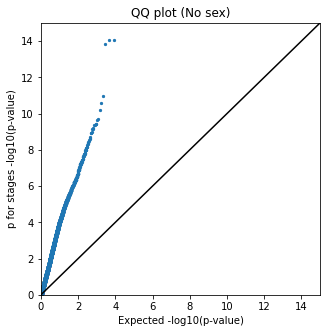

In [294]:
fig, ax = plt.subplots(figsize = (5, 5))
ax.scatter(nosexdf['-logp_expected'], nosexdf['-logp_nosex'], s = 5)
ax.plot([15, 0], [15, 0], color = "black")

plt.xlim([0, 15])
plt.ylim([0, 15])
plt.xlabel("Expected -log10(p-value)")
plt.ylabel("p for stages -log10(p-value)")
plt.title('QQ plot (No sex)')
plt.savefig('QQplotNosex')
    
plt.show()

### Select differentially expressing genes with FDR < 0.1

In [296]:
diff_genes_nosex = []
DiffgeneNosex = open('DiffgeneNosex.txt', 'w')
DiffgeneNosex.write('Differentially expressing gene list (without controlling sex):\n')
for i in range(8613):
    if nosexdf['p_nosex'][nosexdf.index[i]]*8613/(i+1) <= 0.1:
        diff_genes_nosex.append(nosexdf['gene_name'][nosexdf.index[i]])
        DiffgeneNosex.write(nosexdf['gene_name'][nosexdf.index[i]]+'\n')
    else:
        break
DiffgeneNosex.close()
diff_genes_nosex

['Ppa',
 'Ppa',
 'Ppa',
 'CG14915',
 'CG8960',
 'term',
 'CG7271',
 'CG34214',
 'Dtg',
 'CG6770',
 'twi',
 'twi',
 'hkb',
 'Nrt',
 'CG2129',
 'endos',
 'sala',
 'Ilp4',
 'CR45270',
 'D',
 'CG13427',
 'spri',
 'mira',
 'CG13454',
 'CR45270',
 'endos',
 'Bsg25D',
 'CG43725',
 'D',
 'link',
 'CG4164',
 'CR45270',
 'Tcp-1zeta',
 'Cys',
 'brk',
 'CG45099',
 'Jafrac1',
 'mip40',
 'CG8026',
 'Kr',
 'dhd',
 'CG45085',
 'CR44676',
 'Bx',
 'Kr',
 'CG17249',
 'GILT2',
 'CG6293',
 'CG5059',
 'GstD3',
 'spo',
 'CG8635',
 'spo',
 'CG10932',
 'CG1218',
 'Hsp26',
 'Hsp26',
 'CG14317',
 'cbt',
 'CG6180',
 'CG10932',
 'retn',
 'cN-IIIB',
 'Aats-tyr',
 'CG9953',
 'CG5569',
 'CG4440',
 'CG10035',
 'png',
 'Pmm45A',
 'lost',
 'aret',
 'CG14937',
 'CSN7',
 'mtrm',
 'CG6015',
 'CG8929',
 'CR43949',
 'GstO2',
 'CREG',
 'CG6293',
 'CG10035',
 'sna',
 'pont',
 'GlcT-1',
 'CG34224',
 'E(spl)m7-HLH',
 'CG42662',
 'croc',
 'mRpS29',
 'kin17',
 'CG5537',
 'btd',
 'Cpr60D',
 'CG15771',
 'Catsup',
 'hyx',
 'Dlc90F',


### Linear regression with sex as a covariate

In [297]:
p = []
coef = []
for i in range(8613):
    func = 'gene'+str(i)+' ~ stage+sex'
    model = smf.ols(formula = func, data = lsdf)
    results = model.fit()
    p.append(results.pvalues[2])
    coef.append(results.params[2])

In [298]:
adjdf['p_stage_sexcontrolled'] = p
adjdf['coef_stage_sexcontrolled'] = coef
adjdf

/Users/zelinwei/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/zelinwei/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,t_name,gene_name,male_10,male_11,male_12,male_13,male_14A,male_14B,male_14C,male_14D,...,female_12,female_13,female_14A,female_14B,female_14C,female_14D,p_nosex,coef_nosex,p_stage_sexcontrolled,coef_stage_sexcontrolled
3,FBtr0302347,CR40182,0.894399,-1.326899,0.462930,-0.920243,0.139644,1.293162,0.769528,-1.405035,...,-0.288319,-1.154196,1.849998,0.778540,-0.742605,-0.149327,0.735893,0.059950,0.745479,0.059950
8,FBtr0113885,Parp,0.766785,-1.085765,-1.085765,-1.085765,0.882845,-1.085765,0.950483,0.757175,...,0.885037,0.875214,1.007136,0.383388,-1.085765,1.092291,0.162378,0.240072,0.174987,0.240072
9,FBtr0301810,Alg-2,0.428503,-3.370617,0.248005,0.699691,0.540822,-0.207972,0.198251,0.148145,...,0.402975,0.663503,0.691111,-0.246612,-0.254680,0.556858,0.263080,0.194775,0.274123,0.194775
10,FBtr0113895,Tim17b,-1.478530,-1.913186,-1.489018,0.762364,0.725033,-1.306743,0.827456,0.515728,...,0.501482,0.863839,0.897524,0.026917,0.431642,0.859727,0.031521,0.352310,0.018751,0.352310
11,FBtr0345179,Tim17b,1.027117,-2.497985,1.037403,0.338083,0.277583,1.083592,0.443573,-0.024726,...,-0.084720,0.542136,0.557127,-0.853882,-0.197911,0.511195,0.221445,0.211856,0.227350,0.211856
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34663,FBtr0100884,mt:Cyt-b,-0.149574,-2.083787,-0.847416,1.298152,0.495028,-0.304327,0.290070,0.600397,...,0.063068,0.291400,0.977368,0.005558,0.318898,0.776092,0.049018,0.326779,0.056993,0.326779
34665,FBtr0100886,mt:ND1,-0.608902,-2.362639,-0.692590,0.888209,0.659853,-0.224828,0.708952,0.469638,...,0.418821,0.751013,0.800928,-0.684750,0.031499,1.025168,0.051185,0.324124,0.057250,0.324124
34667,FBtr0100888,mt:lrRNA,0.588187,-2.219895,-0.026424,1.085507,0.562651,-0.322836,0.630489,0.357044,...,0.539919,0.899375,-1.368954,-0.505109,-0.220892,1.031198,0.546605,0.106654,0.560402,0.106654
34684,FBtr0114261,CR41590,0.131551,-0.741197,0.338448,0.389880,-0.741197,-0.741197,-0.741197,0.565529,...,-0.741197,0.804493,0.820041,-0.741197,-0.741197,-0.066087,0.170680,-0.235737,0.177894,-0.235737


### QQ plot with sex as a covariate

In [299]:
sexdf = adjdf.sort_values(by = 'p_stage_sexcontrolled')
sexdf['p_expected'] = (np.arange(8613)+1)/8613
sexdf['-logp_stage_sexcontrolled'] = -np.log10(sexdf['p_stage_sexcontrolled'])
sexdf['-logp_expected'] = -np.log10(sexdf['p_expected'])
sexdf

,t_name,gene_name,male_10,male_11,male_12,male_13,male_14A,male_14B,male_14C,male_14D,...,female_14B,female_14C,female_14D,p_nosex,coef_nosex,p_stage_sexcontrolled,coef_stage_sexcontrolled,p_expected,-logp_stage_sexcontrolled,-logp_expected
20646,FBtr0071924,Ppa,-1.619458,-1.067838,-0.469793,0.058516,0.744762,0.953572,0.740274,0.802315,...,0.893702,0.889975,0.905391,8.260525e-15,0.650662,6.477941e-14,0.650662,0.000116,13.188563,3.935154
20647,FBtr0330249,Ppa,-1.619458,-1.067838,-0.469793,0.058516,0.744762,0.953572,0.740274,0.802315,...,0.893702,0.889975,0.905391,8.260525e-15,0.650662,6.477941e-14,0.650662,0.000232,13.188563,3.634124
20645,FBtr0343014,Ppa,-1.608726,-1.080248,-0.482852,0.050976,0.746560,0.958364,0.742007,0.804934,...,0.897632,0.893852,0.909489,1.454301e-14,0.650326,1.140239e-13,0.650326,0.000348,12.943004,3.458033
31213,FBtr0080193,CG14915,-1.610521,-0.912963,-0.291593,0.024372,0.611349,0.934829,0.947850,0.760982,...,0.804264,0.914268,0.781926,1.047712e-11,0.643531,2.904440e-11,0.643531,0.000464,10.536938,3.333094
8734,FBtr0072872,CG8960,-1.735691,-0.959507,-0.276937,0.119640,0.482266,0.833156,0.819946,0.793056,...,0.943115,0.960569,0.719588,2.536184e-11,0.642023,1.323227e-10,0.642023,0.000581,9.878366,3.236184
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23593,FBtr0071095,RpS14a,0.198663,-0.649073,0.328632,-0.322096,0.764758,0.511103,0.840189,1.062026,...,1.102237,-2.009865,-2.368579,9.985308e-01,0.000328,9.984889e-01,0.000328,0.999536,0.000657,0.000202
22297,FBtr0345315,CG2924,0.812154,-0.078765,0.545372,0.959713,0.845331,-0.661262,-0.653000,-0.495311,...,0.530679,0.696319,-0.082080,9.987745e-01,-0.000274,9.988044e-01,-0.000274,0.999652,0.000520,0.000151
4086,FBtr0300247,CG7215,1.662084,-0.568209,1.772774,-0.831349,-0.641496,-0.620478,0.523850,0.575282,...,-0.618640,0.611698,1.794608,9.991114e-01,0.000198,9.991187e-01,0.000198,0.999768,0.000383,0.000101
10098,FBtr0076886,RhoGEF4,-0.007812,0.692050,-0.815778,-1.239852,-0.001025,-0.351522,1.487058,-0.468892,...,2.120886,0.620118,-0.907898,9.995359e-01,-0.000104,9.995516e-01,-0.000104,0.999884,0.000195,0.000050


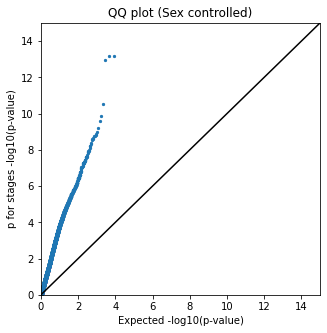

In [301]:
fig, ax = plt.subplots(figsize = (5, 5))
ax.scatter(sexdf['-logp_expected'], sexdf['-logp_stage_sexcontrolled'], s = 5)
ax.plot([15, 0], [15, 0], color = "black")

plt.xlim([0, 15])
plt.ylim([0, 15])
plt.xlabel("Expected -log10(p-value)")
plt.ylabel("p for stages -log10(p-value)")
plt.title('QQ plot (Sex controlled)')
plt.savefig('QQplotWithsex')
    
plt.show()

### Select differentially expressing genes with FDR < 0.1

In [302]:
diff_genes_sex = []
for i in range(8613):
    if sexdf['p_stage_sexcontrolled'][sexdf.index[i]]*8613/(i+1) <= 0.1:
        diff_genes_sex.append(sexdf['gene_name'][sexdf.index[i]])
    else:
        break

sexdf['color'] = ['red']*i + ['black']*(8613-i) #Set colors for volcano plot.
        
diff_genes_sex

['Ppa',
 'Ppa',
 'Ppa',
 'CG14915',
 'CG8960',
 'term',
 'CG7271',
 'CG34214',
 'CG6770',
 'Dtg',
 'twi',
 'twi',
 'Ilp4',
 'hkb',
 'CG2129',
 'Nrt',
 'endos',
 'sala',
 'CR45270',
 'CG13427',
 'D',
 'spri',
 'CR45270',
 'mira',
 'CG13454',
 'Bsg25D',
 'endos',
 'CG43725',
 'Tcp-1zeta',
 'CR45270',
 'link',
 'D',
 'CG6180',
 'CG4164',
 'Cys',
 'Kr',
 'brk',
 'CG45099',
 'CR44676',
 'Kr',
 'CG8026',
 'Jafrac1',
 'CG17249',
 'mip40',
 'dhd',
 'CG1218',
 'CG45085',
 'CG10932',
 'Bx',
 'GILT2',
 'CG5059',
 'CG6293',
 'CG10932',
 'CG10035',
 'Hsp26',
 'Hsp26',
 'CG8635',
 'GstD3',
 'CG14317',
 'spo',
 'spo',
 'retn',
 'cbt',
 'cN-IIIB',
 'Aats-tyr',
 'CG4440',
 'CG9953',
 'CG5569',
 'png',
 'Pmm45A',
 'CSN7',
 'lost',
 'aret',
 'CG14937',
 'mtrm',
 'CG8929',
 'CG10035',
 'CG6015',
 'CR43949',
 'GstO2',
 'CG15771',
 'pont',
 'sna',
 'CREG',
 'btd',
 'CG6293',
 'CG42662',
 'GlcT-1',
 'CG15771',
 'kin17',
 'E(spl)m7-HLH',
 'CG34224',
 'mRpS29',
 'Aldh',
 'gt',
 'croc',
 'CG5537',
 'Cpr60D',
 '

In [303]:
Noverlap = 0
for each in diff_genes_nosex:
    if each in diff_genes_sex:
        Noverlap += 1

print('Overlap percentage: ', Noverlap/len(diff_genes_nosex)*100, ' %')

Overlap percentage:  96.93931398416886  %


In [304]:
DiffgeneSex = open('DiffgeneSex.txt', 'w')
DiffgeneSex.write('Differentially expressing gene list (with sex as a covariate):\n')
DiffgeneSex.write('(96.94 % overlapping with no sex-controlling result)\n')
for each in diff_genes_sex:
    DiffgeneSex.write(each+'\n')
    
DiffgeneSex.close()

### Volcano plot

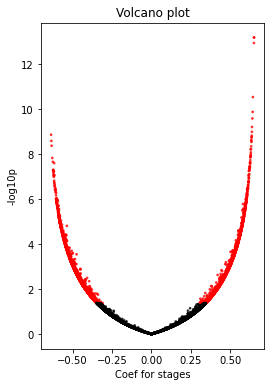

In [306]:
fig2, axnew = plt.subplots(figsize = (4, 6))
axnew.scatter(sexdf['coef_stage_sexcontrolled'], sexdf['-logp_stage_sexcontrolled'], c = sexdf['color'], alpha = 0.7, s = 3)

plt.ylabel('-log10p')
plt.xlabel('Coef for stages')
plt.title('Volcano plot')
plt.savefig('VolcanoPlot')
plt.show()